# Load Packages

In [54]:
# !pip install pydot
# !pip install keras-metrics

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [431]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.models import model_from_json
from keras.preprocessing.text import text_to_word_sequence
from keras.utils.vis_utils import plot_model
from keras import metrics
# from keras import history
import pydot

## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt
# import matplotlib.pyplot

# # NLTK
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# from nltk.stem import SnowballStemmer

# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# from sklearn import metrics
# from numpy import util


# Word2Vec
from gensim.test.utils import common_texts, get_tmpfile # not working
from gensim.models import Word2Vec

import re
from collections import Counter
import os


# Baseline Model 3,000 sequence (wip)
## not sure if i still have model json and h5, but we do have screenshot

# Baseline LSTM and LSTM CNN (wip)

# LSTM and LSTM CNN: Downsampled (wip)

# Model_Downsampled_IncreaseSeqLen.ipynb (wip)

# Model_Downsampled_DecreaseSeqLen.ipynb (wip

# Note: using the whole test dataset, not just downsampled test dataset

In [ ]:
downsampled_csv = pd.read_csv('final_shuffled_test.csv')

In [463]:
# run this for downsampled

# X_train = downsampled_csv['8K_Content_sequences'][downsampled_csv['Year'] <= 2008]
# X_dev = downsampled_csv['8K_Content_sequences'][(downsampled_csv['Year'] >= 2009) & 
#                                        (downsampled_csv['Year'] <= 2010)]
X_test = downsampled_csv['8K_Content_sequences']

# y_train = downsampled_csv[['down','stay','up']][downsampled_csv['Year'] <= 2008]
# y_dev = downsampled_csv[['down','stay','up']][(downsampled_csv['Year'] >= 2009) & 
#                                        (downsampled_csv['Year'] <= 2010)]
y_test = downsampled_csv[['down','stay','up']]

In [464]:
# load model

model_num = 4

# load json and create model
json_file = open('model_lstm_%d.json' %model_num, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_lstm_%d.h5" %model_num)
print("Loaded model from disk: ", 'model_lstm_%d.json and model_lstm_%d.h5' %(model_num, model_num))

Loaded model from disk:  model_lstm_4.json and model_lstm_4.h5


In [465]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', 
                     metrics=[metrics.categorical_accuracy])
# loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(np.array(X_test.values.tolist()), 
                              np.array(y_test.values.tolist()), verbose=0, )
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

categorical_accuracy: 55.39%


## Compare these predictions to actuals. trend by industry?
## Do this for LSTM CNN too

In [485]:
# predictions 
preds = loaded_model.predict(np.array(X_test.values.tolist()))

In [533]:
# downsampled_csv['8K_Content'].iloc[:50].str.split()
downsampled_csv['8K_Content_length'] = downsampled_csv['8K_Content'].str.split().str.len()

/home/raymondleemids/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [534]:
downsampled_csv['8K_Content_length']

2          1722
4          1406
6          1277
7          1353
12          438
13          356
30          841
31          152
37          446
40          288
41         1269
43        35421
45          248
51        22217
53          713
59         1470
69         1805
70          376
76        13834
80         4858
85         2564
88         2312
90          238
93         1839
94        12225
97         1171
99         1661
102         144
105        3345
107         476
          ...  
107324     1089
107326     1862
107327     1996
107334      255
107342      679
107349     3680
107359     1350
107360     2330
107367      521
107369      509
107376     6535
107377      780
107378     1255
107381    55371
107384      732
107385    16671
107391      213
107395     5994
107405      518
107406      452
107407     2958
107412     1824
107421     2050
107425     2480
107431    53156
107432    47041
107440     1965
107445      299
107449    47820
107454     2724
Name: 8K_Content_length,

In [551]:
downsampled_csv['8K_Content_length'].sum()

144981927

In [555]:
downsampled_csv['8K_Content_length'].mean()

5424.346266087998

In [556]:
downsampled_csv['8K_Content_length'].std()

14917.307474981979

In [557]:
max(downsampled_csv['8K_Content_length'])

303411

In [558]:
downsampled_csv['8K_Content_length'].to_csv('test_csv_8K_length.csv')

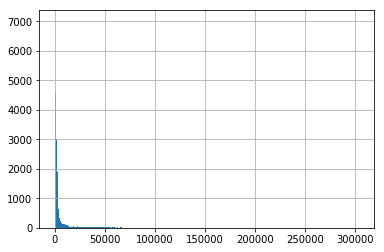

In [539]:
downsampled_csv_8K_length = downsampled_csv['8K_Content_length'].hist(bins=500)

In [548]:
downsampled_csv_8K_length

[]

In [530]:
len(downsampled_csv['8K_Content'].iloc[46].split()

35071

In [531]:
downsampled_csv['8K_Content'].iloc[46]

' Check the appropriate box below if the Form 8-K filing is intended to simultaneously satisfy the filing obligation of the registrant under any of the following provisions: o           Written communications pursuant to Rule 425 under the Securities Act (17 CFR 230.425) o           Soliciting material pursuant to Rule 14a-12 under the Exchange Act (17 CFR 240.14a-12) o           Pre-commencement communications pursuant to Rule 14d-2(b) under the Exchange Act (17 CFR 240.14d-2(b)) o           Pre-commencement communications pursuant to Rule 13e-4(c) under the Exchange Act (17 CFR 240.13e-4(c))   Item 1.01. Entry into a Material Definitive Agreement. On August 14, 2012, in connection with the previously announced private offering, Prospect Capital Corporation ("Prospect", "Company", "we" or "our") issued $200 million in aggregate principal amount of 5.75% Convertible Senior Notes due 2018 (the "Notes") under an indenture, dated as of August 14, 2012 (the "Indenture"), between the Compan

In [515]:
downsampled_csv['8K_Content'].str.split()

2         [Check, the, appropriate, box, below, if, the,...
4         [Check, the, appropriate, box, below, if, the,...
6         [Check, the, appropriate, box, below, if, the,...
7         [UNITED, STATESSECURITIES, AND, EXCHANGE, COMM...
12        [UNITED, STATESSECURITIES, AND, EXCHANGE, COMM...
13        [Check, the, appropriate, box, below, if, the,...
30        [Check, the, appropriate, box, below, if, the,...
31        [Check, the, appropriate, box, below, if, the,...
37        [Check, the, appropriate, box, below, if, the,...
40        [Check, the, appropriate, box, below, if, the,...
41        [Check, the, appropriate, box, below, if, the,...
43        [Check, the, appropriate, box, below, if, the,...
45        [UNITED, STATESSECURITIES, AND, EXCHANGE, COMM...
51        [Check, the, appropriate, box, below, if, the,...
53        [SECURITIES, AND, EXCHANGE, COMMISSIONWASHINGT...
59        [Check, the, appropriate, box, below, if, the,...
69        [Check, the, appropriate, box,

In [507]:
len(downsampled_csv['8K_Content_sequences'].iloc[0])

300

In [502]:
downsampled_csv['8K_Content'].iloc[0]

'              Check the appropriate box below if the Form 8-K filing is intended to simultaneously satisfy the filing obligation of the registrant under any of the following provisions (see General Instruction A.2. below):       On February 27, 2012, Career Education Corporation (the "Registrant") issued a press release describing the Registrant\'s financial results for the quarter and fiscal year ended December 31, 2011.A copy of the press release is being furnished as Exhibit 99.1, and the information contained therein is incorporated herein by reference. The information contained in Item 2.02 of this Form 8-K, including the exhibit, shall not be deemed "filed" for purposes of Section 18 of the Securities Exchange Act of 1934, as amended, and the information shall not be deemed incorporated by reference into any filing under the Securities Act of 1933, as amended, except as shall be expressly set forth by specific reference in such a filing.    Pursuant to the requirements of the Se

In [500]:
downsampled_csv['8K_Content'].iloc[:50].str.len()

2       11786
4        9500
6        8718
7        9349
12       2891
13       2432
30       5889
31        977
37       3006
40       1862
41       8784
43     225180
45       1828
51     134628
53       5155
59      10188
69      11406
70       2468
76      85619
80      33951
85      17938
88      15681
90       1658
93      13255
94      73806
97       8625
99      11084
102       940
105     21699
107      3180
110     22252
126      5824
130     14757
136      5021
142     17608
145     53852
156      9641
158     44145
162       689
174      6149
175      8704
176      1910
189      6849
190     13720
191     14031
193      6095
195    221446
197     13221
201     18218
206     15035
Name: 8K_Content, dtype: int64

In [492]:
preds

array([[0.24205616, 0.08703232, 0.6709115 ],
       [0.49730492, 0.11157771, 0.39111742],
       [0.4114454 , 0.12579481, 0.46275976],
       ...,
       [0.12276173, 0.647173  , 0.23006532],
       [0.0200537 , 0.95937234, 0.02057386],
       [0.42816988, 0.13673027, 0.4350998 ]], dtype=float32)

In [428]:
# hist_by_industry

,Tag
,count
Industry,
Consumer Discretionary,6235
Consumer Staples,1463
Energy,1764
Financials,4674
Health Care,3586
Industrials,3995
Information Technology,7433
Materials,1764


In [487]:
downsampled_csv['down'].sum()

2572

In [488]:
downsampled_csv['stay'].sum()

21635

In [489]:
downsampled_csv['up'].sum()

2521

In [491]:
21635 / downsampled_csv['down'].count()

0.8094507632445376

In [468]:

# from sklearn.metrics import precision_recall_fscore_support as score

# predicted = pred_upd
# y_test = downsampled_csv['stock_overnight_movement_tag']['Tag' == 'test']

# precision, recall, fscore, support = score(predicted, y_test)

# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
# print('fscore: {}'.format(fscore))
# print('support: {}'.format(support))

# Model_Downsampled_DecreaseSeqLen_IncreaseEpochs.ipynb

In [ ]:
# set model # for saving the model and weights to json and h5
model_num = 5

In [ ]:
# load model
# note: latest file updated 11/30. 3,000 word sequence.

# load json and create model
json_file = open('model_lstm_%d.json' %model_num, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_lstm_%d.h5" %model_num)
print("Loaded model from disk: ", 'model_lstm_%d.json and model_lstm_%d.h5' %(model_num, model_num))

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(np.array(X_test.values.tolist()), 
                              np.array(y_test.values.tolist()), verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
# predictions 
preds = loaded_model.predict(np.array(X_test.values.tolist()))


# Model_Downsampled_DecreaseSeqLen_IncreaseEpochs_IncreaseDropout.ipynb

In [ ]:
# set model # for saving the model and weights to json and h5
model_num = 6

In [ ]:
# load model
# note: latest file updated 11/30. 3,000 word sequence.

# load json and create model
json_file = open('model_lstm_%d.json' %model_num, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_lstm_%d.h5" %model_num)
print("Loaded model from disk: ", 'model_lstm_%d.json and model_lstm_%d.h5' %(model_num, model_num))

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(np.array(X_test.values.tolist()), 
                              np.array(y_test.values.tolist()), verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
# predictions 
preds = loaded_model.predict(np.array(X_test.values.tolist()))